In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 100, size=100)
X[:, 1] = 0.75*X[:, 0] + 3. + np.random.normal(0, 5, size=100)

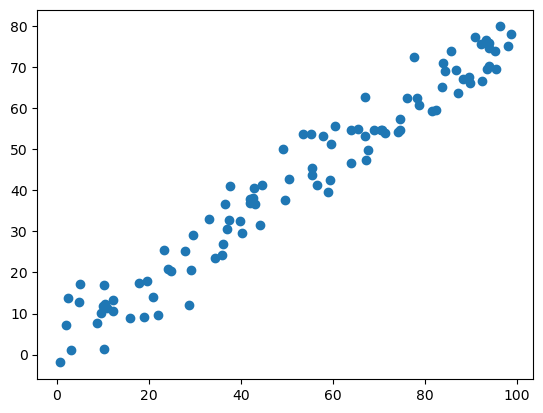

In [3]:
plt.scatter(X[:, 0], X[:, 1])

# 手写识别的例子


In [5]:
from sklearn import datasets
digits = datasets.load_digits()

In [6]:
X = digits.data
y = digits.target

In [7]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)

In [10]:
X


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
example_digits = noisy_digits[y==0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [12]:
example_digits.shape

(100, 64)

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

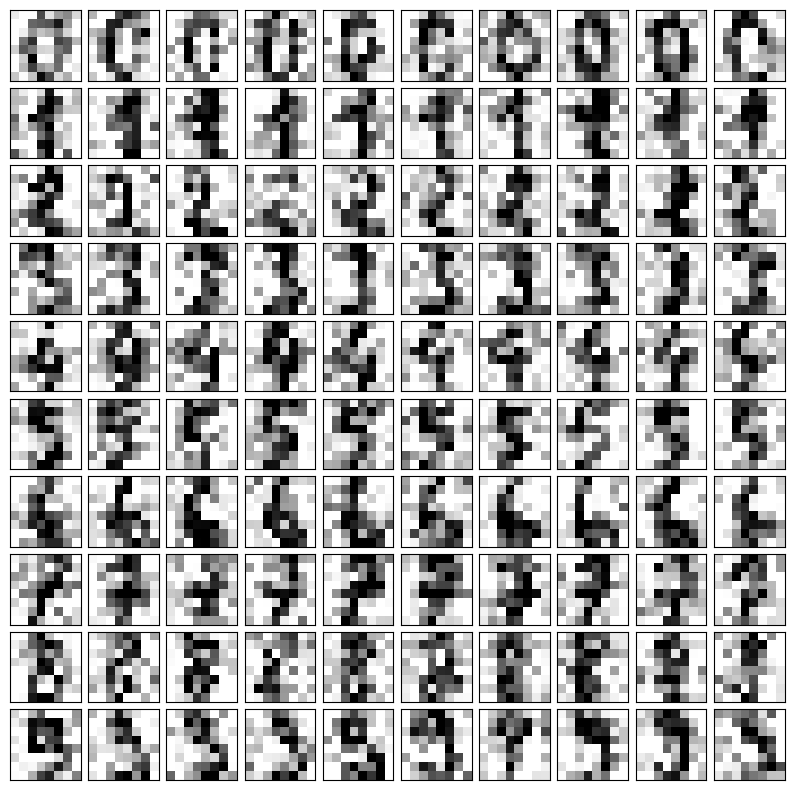

In [15]:
plot_digits(example_digits)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(0.5)
pca.fit(noisy_digits)
digits_reduction = pca.transform(example_digits)

In [28]:
digits_reduction.shape

(100, 12)

In [32]:
filtered_digits = pca.inverse_transform(digits_reduction)

In [33]:
filtered_digits.shape

(100, 64)

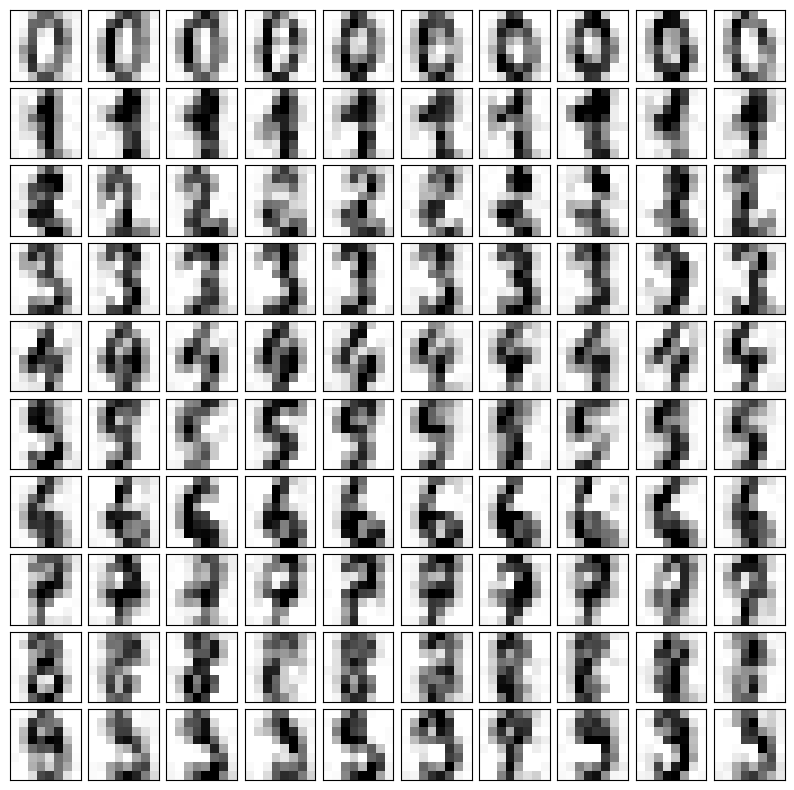

In [34]:
plot_digits(filtered_digits)